# Presentation of the implementation of the Louvain and Leiden algorithms

For starters, import the dependencies; the NetworkX python library for handling graphs and the algorithm implementations.

In [1]:
import random

import networkx as nx
import matplotlib.pyplot as plt

from community_detection.leiden import leiden
from community_detection.louvain import louvain
from community_detection.quality_functions import CPM, Modularity

# Seed random number generator to make this notebook reproducible
random.seed(0)

## Zachary's Karate Club Graph

In [2]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=1)

_Zachary's Karate Club_ is a graph that represents the social structure in a Karate club.
The nodes represent instructors and students in the club.
There are two instructors, "Mr. Hi" and the "Officer", as well as 32 students.
An edge between two nodes indicates that these people interacted at some point.

In order to facilitate drawing graphs, we'll use the following function, which indicates communities in the graph by coloring the nodes according to their community's color:

In [3]:
def draw_graph(G, pos=None, communities=None, labels=None, force_color={}):
    if communities:
        # Create a color map
        node_color = [0 for _ in G]

        for i, community in enumerate(communities):
            for node in community:
                node_color[node] = i

        for k, v in force_color.items():
            node_color[k] = v

        nx.draw(G, pos, node_color=node_color, cmap=plt.cm.rainbow, labels=labels)
    else:
        nx.draw(G, pos, labels=labels)

    plt.show()

With the drawing function given above, we can draw the Karate Club graph:

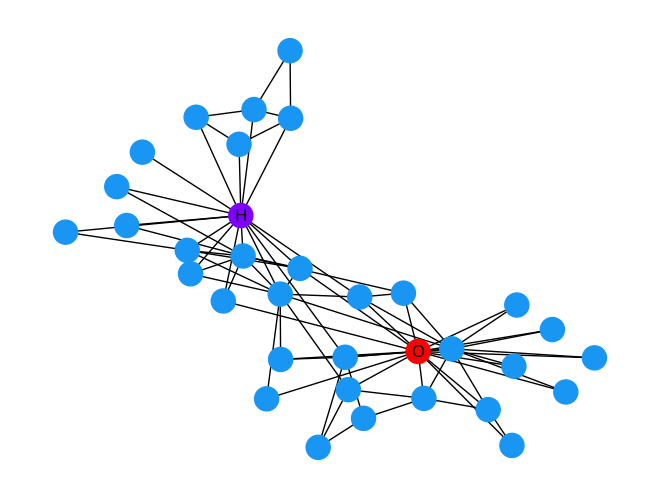

In [4]:
force_color = {0: -1, 33: 4}  # Mark Mr. Hi / the officer with dark and light blue respectively.
labels = {0: "H", 33: "O"}
draw_graph(G, pos, [set(G.nodes())], labels, force_color)

The two rivaling trainers are indicated with their initials, "H" and "O", was well as their own colors; Mr. Hi with a purple node and the officer with a red one.

## Louvain

For this graph `G`, we calculate a partition into communities using Modularity as the quality function and the Louvain algorithm. 
For the modularity we use a resolution of $\gamma = 0.8$. This value was chosen experimentally.

In [5]:
𝓗 = Modularity(0.8)
𝓟 = louvain(G, 𝓗, weight="weight")

The result of the Leiden algorithm is shown below.

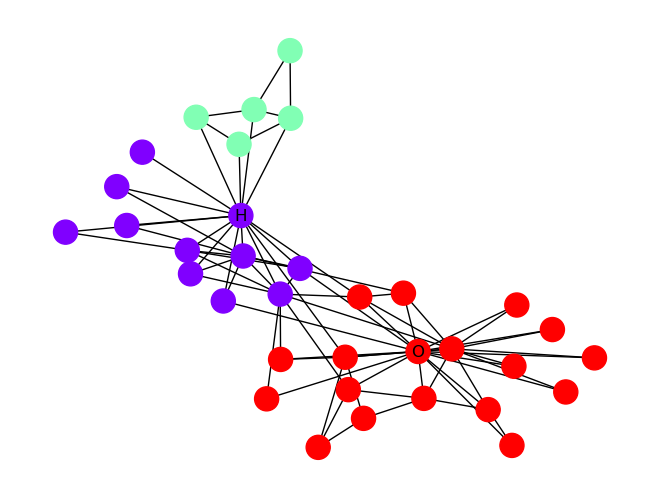

Modularity after Louvain: 𝓗(𝓟)=0.519045745019771


In [6]:
draw_graph(G, pos, 𝓟.communities, labels)
print(f"Modularity after Louvain: {𝓗(𝓟)=}")

The Louvain algorithm identified three communities in this graph, identified by the red, purple, and light green nodes:  

It is easy to see that the violet community is centered on Mr. Hi and that the green community is centered on the officer.
Furthermore, there is a community, identified by the red nodes, that only has connections to Mr. Hi, but not to any other students.

## Leiden

We now apply the Leiden algorithm to the same graph, again using Modularity with $\gamma = 0.8$ as a quality function:

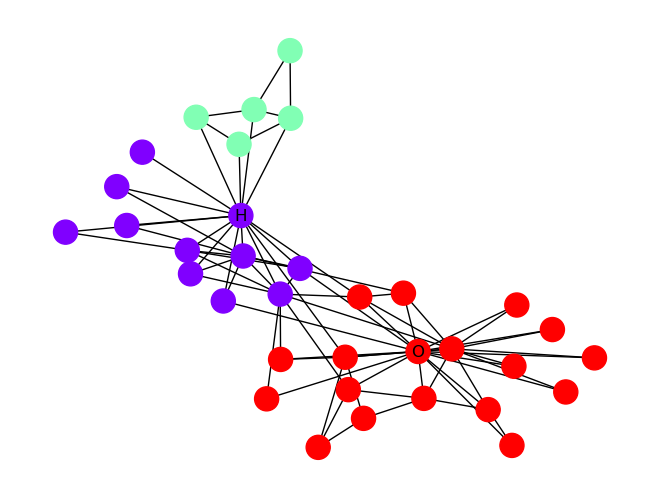

Modularity after Leiden: 𝓗(𝓠)=0.519045745019771


In [7]:
# Calculate a new partition into communities, using Modularity and the Leiden algorithm …
𝓠 = leiden(G, 𝓗, weight="weight")
# … and draw the result:
draw_graph(G, pos, 𝓠.communities, labels)
print(f"Modularity after Leiden: {𝓗(𝓠)=}")

This is the same partition as the one the Louvain algorithm arrived at, for the given quality function and graph.